<a href="https://colab.research.google.com/github/YazCodes/stroke-prediction-DNN/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Research Lifecylce - **Stroke Prediction**

In [40]:
# Importing libraries
import pandas as pd #programming language for data manipulation and analysis
import numpy as np #array-processing package
import matplotlib.pyplot as plt #used to create plots 
import seaborn as sns 

#This is reading the csv file 
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df.head()

#stroke: 1 if the patient had a stroke or 0 if not

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data exploration (EDA)**

Create some visualisations from the data, try to find some useful
insights.

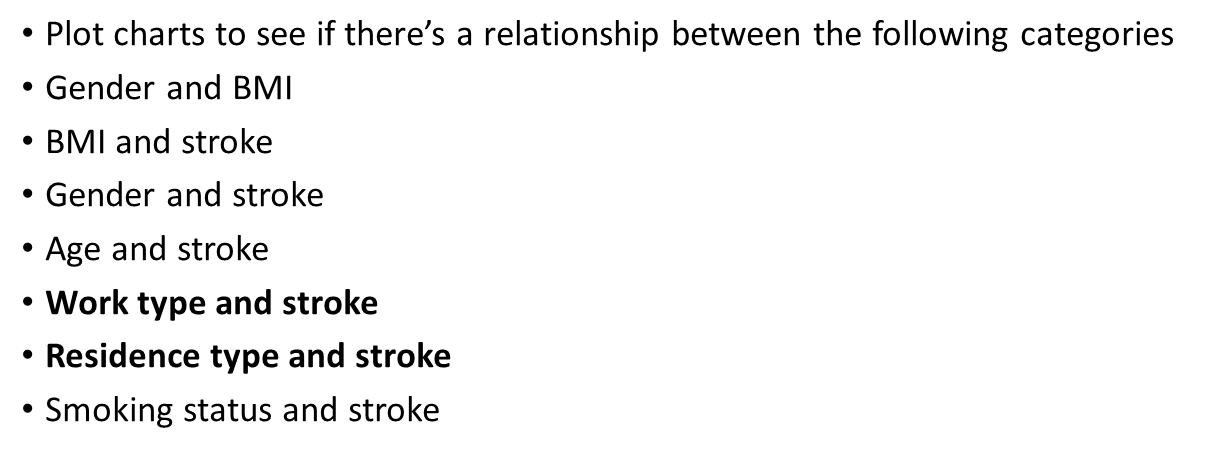



Text(0, 0.5, '#Employee')

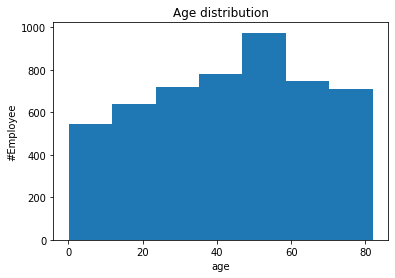

In [30]:
fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['age'],bins = 7) # Here you can play with number of bins
#Labels and Tit
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('#Employee')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


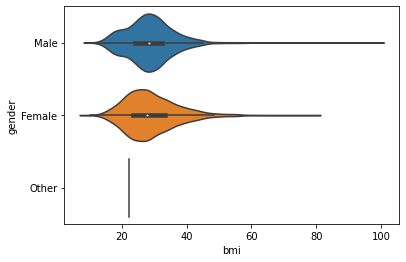

In [32]:
sns.violinplot(df['bmi'], df['gender']) #Variable Plot

gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Other     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

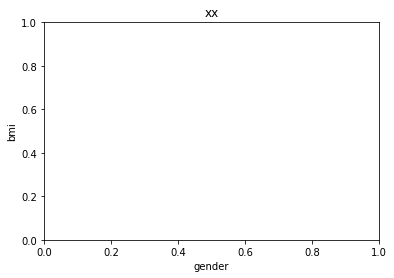

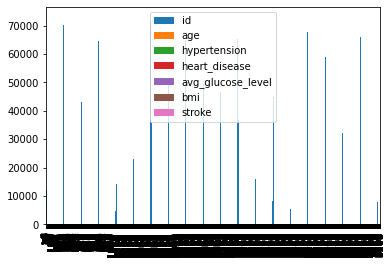

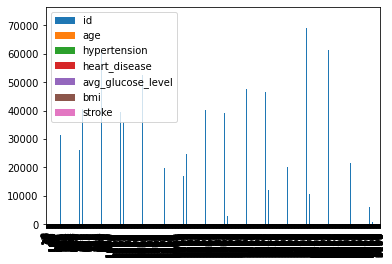

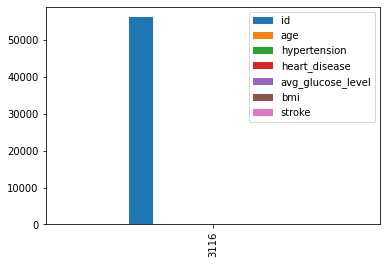

In [33]:
var = df.groupby('gender')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('gender')
ax1.set_ylabel('bmi')
ax1.set_title("xx")
var.plot(kind='bar')

In [34]:
#DATA VISUALISATION 

#Chart one - bar chart 

#ax = df[['gender','stroke']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("gender", fontsize=12)
#ax.set_ylabel("stroke", fontsize=12)
#plt.show()

#plot_df = df[['gender','stroke']]
#df.plot.scatter(x="stroke", y="gender", s=10, title="Price of rooms depending on location", c='green')


#my_labels = df['age'],df['bmi']
##plt.pie(df[['age','bmi']],labels=my_labels,autopct='%1.1f%%')
#plt.title('My Title')
#plt.axis('equal')
#plt.show()


Data pre-processing


In [35]:

df.isnull().values.any() #This shows if there are any missing values in the dataset. True = yes false = No

True

In [36]:
df.isnull().sum().sum() #The total of missing values in the dataset

201

In [41]:
df.isnull().sum() #This locates where the missing values are located in each feature

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
#As we cannot create our own BMI values due to hospital ethics i have decided to drop any missing rows with missing bmi values

df = df.dropna()
print(df)


         id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
5     56669    Male  81.0  ...  29.0  formerly smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5104  14180  Female  13.0  ...  18.6          Unknown      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[4909 rows x 12 columns]


In [44]:
#check if it droped the missing value rows
df['bmi'].isnull()
df.isnull().sum().sum()

0

In [48]:
# Find a duplicate rows
duplicateDFRow = df[df.duplicated()]
print("duplicate rows:"), (duplicateDFRow)

#find duplicate row based on a column 
#duplicateDFRow = df[df.duplicated(['Name'])]
#print(duplicateDFRow)

duplicate rows:


(None, Empty DataFrame
 Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
 Index: [])

In [49]:
#checking for data types

df.dtypes #The type of data in each column

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [50]:
#number of rows if df
len(df)

4909